# Lab4

## import libs and connect to database

In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                    host = host,
                    user = user,
                    password = pwd,
                    database = db
                       )

In [4]:
cur=conn.cursor()

## q1

In [5]:
sql_q1 = """
            select * from gp11.student
            """

In [6]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@dukes.jmu.edu,student 1,IA
1,s2@dukes.jmu.edu,student 2,IA
2,s3@dukes.jmu.edu,student 3,IA
3,s4@dukes.jmu.edu,student 4,IA
4,s5@dukes.jmu.edu,student 5,IA
5,s7@jmu.edu,s7,GS
6,s8@jmu.edu,s8,GS


## q2

In [7]:
sql_q2 = """
        select gp11.professor.p_name,
        gp11.course.c_name
        from gp11.professor
        inner join gp11.course
        on gp11.professor.p_email = gp11.course.p_email
        """

In [8]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,noel hendrickson,intro to ia
1,orlandrew danzell,intro to nat sec
2,Kathleen Moore,tech apps
3,Timothy walton,hyp testing
4,noel hendrickson,counter reasoning
5,Stephen marrin,capstone
6,ron raab,wmd
7,Kathleen Moore,hacking diplomacy
8,Stephen marrin,honor thesis
9,new_p,new_c_name


## q3

In [9]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp11.enroll_list
        group by c_number
        order by enrolled desc
        """

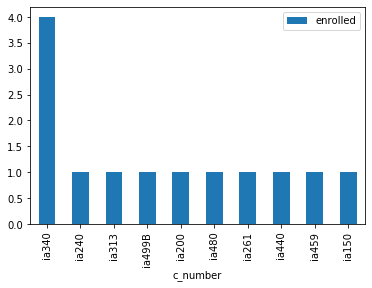

In [10]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [11]:
sql_q4 = """
        select gp11.professor.p_name,
        count(gp11.course.c_name) as teaching_number
        from gp11.professor
        inner join gp11.course
        on gp11.professor.p_email = gp11.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

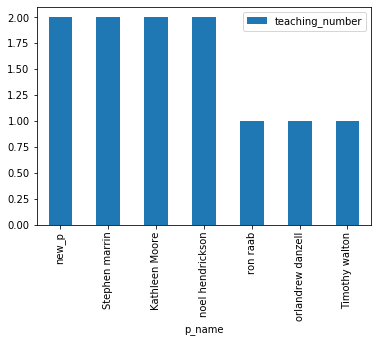

In [12]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

# q5

In [31]:
sql_q5_professor = """
                    insert into gp11.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('hami@jmu.edu','new_p','new_off')

In [32]:
cur.execute(sql_q5_professor)

In [33]:
conn.commit()

In [34]:
df=pandas.read_sql_query('select * from gp11.professor',conn)
df[:]

,p_email,p_name,office
0,danzelox@jmu.edu,orlandrew danzell,n/a
1,hendrinx@jmu.edu,noel hendrickson,n a
2,marrinsp@jmu.edu,Stephen marrin,engeo 2104
3,moore8ka@jmu.edu,Kathleen Moore,isat 116
4,raabrw@jmu.edu,ron raab,isat 156
5,teateaa@jmu.edu,Anthony teate,isat 126
6,waltontr@jmu.edu,Timothy walton,isat 326
7,tangjd@jmu.edu,Jeffrey tang,isat 368
8,mcgrawdk@jmu.edu,David McGraw,isat 352
9,new_p@jmu.edu,new_p,new_office


In [41]:
sql_q5_course = """
                insert into gp11.course(c_number,c_name,room,p_email)
                values ('{}','{}','{}','{}')
                """.format('ia_ne','new_c_name','online','newp@jmu.edu')

In [42]:
cur.execute(sql_q5_course)

In [43]:
cur.execute("ROLLBACK")

In [44]:
conn.commit()

In [45]:
df = pandas.read_sql_query('select * from gp11.course',conn)
df[:]

,c_number,c_name,room,p_email
0,ia150,intro to ia,engeo 2301,hendrinx@jmu.edu
1,ia200,intro to nat sec,fest 1022,danzelox@jmu.edu
2,ia240,tech apps,online,moore8ka@jmu.edu
3,ia261,hyp testing,isat 0148,waltontr@jmu.edu
4,ia313,counter reasoning,isat 0148,hendrinx@jmu.edu
5,ia440,capstone,engeo 1301,marrinsp@jmu.edu
6,ia459,wmd,engeo 1301,raabrw@jmu.edu
7,ia480,hacking diplomacy,TBA,moore8ka@jmu.edu
8,ia499B,honor thesis,TBA,marrinsp@jmu.edu
9,ia_new,new_c_name,online,new_p@jmu.edu


## q6

In [47]:
sql_q6_course = """
                update gp11.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [49]:
cur.execute(sql_q6_course)

In [50]:
conn.commit()

In [51]:
df=pandas.read_sql_query('select * from gp11.course',conn)
df[:]

,c_number,c_name,room,p_email
0,ia150,intro to ia,engeo 2301,hendrinx@jmu.edu
1,ia200,intro to nat sec,fest 1022,danzelox@jmu.edu
2,ia240,tech apps,online,moore8ka@jmu.edu
3,ia261,hyp testing,isat 0148,waltontr@jmu.edu
4,ia313,counter reasoning,isat 0148,hendrinx@jmu.edu
5,ia440,capstone,engeo 1301,marrinsp@jmu.edu
6,ia459,wmd,engeo 1301,raabrw@jmu.edu
7,ia480,hacking diplomacy,TBA,moore8ka@jmu.edu
8,ia499B,honor thesis,TBA,marrinsp@jmu.edu
9,ia_new,new_c_name,online,new_p@jmu.edu


In [52]:
sql_q6_professor = """
                    delete from gp11.professor
                    where p_email = '{}'
                    """.format('weixx@jmu.edu')

In [53]:
cur.execute(sql_q6_professor)

In [54]:
conn.commit()

In [57]:
df=pandas.read_sql_query('select * from gp11.professor',conn)
df[:]

,p_email,p_name,office
0,danzelox@jmu.edu,orlandrew danzell,n/a
1,hendrinx@jmu.edu,noel hendrickson,n a
2,marrinsp@jmu.edu,Stephen marrin,engeo 2104
3,moore8ka@jmu.edu,Kathleen Moore,isat 116
4,raabrw@jmu.edu,ron raab,isat 156
5,teateaa@jmu.edu,Anthony teate,isat 126
6,waltontr@jmu.edu,Timothy walton,isat 326
7,tangjd@jmu.edu,Jeffrey tang,isat 368
8,mcgrawdk@jmu.edu,David McGraw,isat 352
9,new_p@jmu.edu,new_p,new_office


## close connection

In [58]:
cur.close()
conn.close()